# Analisis de especies por zonas

### Alejandro Daniel Tupiza Peralta

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

In [2]:
path = 'surveys.csv'

In [3]:
# Creacion DataFrame censo de sepecies
surveys_df = pd.read_csv(path)

In [4]:
surveys_df

,record_id,month,day,year,plot_id,species_id,sex,hindfoot_length,weight
0,1,7,16,1977,2,NL,M,32.0,NaN
1,2,7,16,1977,3,NL,M,33.0,NaN
2,3,7,16,1977,2,DM,F,37.0,NaN
3,4,7,16,1977,7,DM,M,36.0,NaN
4,5,7,16,1977,3,DM,M,35.0,NaN
5,6,7,16,1977,1,PF,M,14.0,NaN
6,7,7,16,1977,2,PE,F,NaN,NaN
7,8,7,16,1977,1,DM,M,37.0,NaN
8,9,7,16,1977,1,DM,F,34.0,NaN
9,10,7,16,1977,6,PF,F,20.0,NaN


In [5]:
tipos_datos = surveys_df.dtypes
tipos_datos

record_id            int64
month                int64
day                  int64
year                 int64
plot_id              int64
species_id          object
sex                 object
hindfoot_length    float64
weight             float64
dtype: object

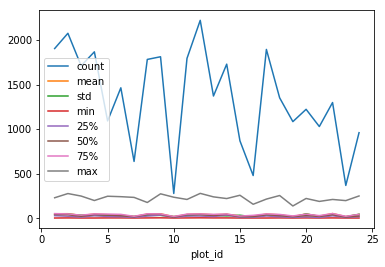

In [96]:
# Estadisticas descriptivas del peso del animal en gramos por cada plot_id (ID de un sitio en particular)
estats_peso = surveys_df.groupby(['plot_id'])['weight'].describe()
estats_peso.plot(kind='line')

Text(0.5, 0.98, 'Diagrama de dispersión del peso frente a la longitud del pie trasero')

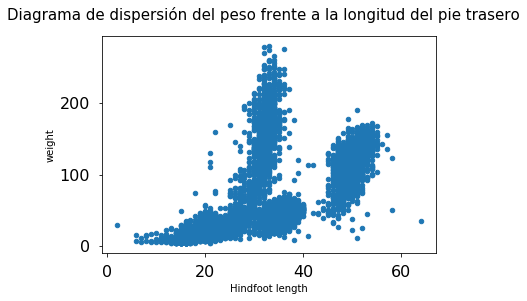

In [97]:
fig, ax1 = plt.subplots()

surveys.plot("hindfoot_length", "weight", kind="scatter", ax=ax1)

# realiza ajustes al gráfico con matplotlib:
ax1.set_xlabel("Hindfoot length")
ax1.tick_params(labelsize=16, pad=8)
fig.suptitle('Diagrama de dispersión del peso frente a la longitud del pie trasero', fontsize=15)


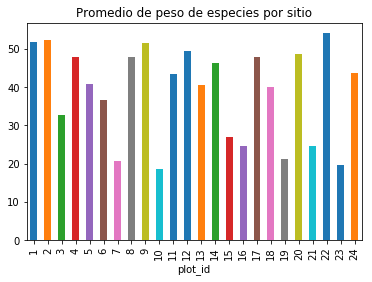

In [98]:
surveys_df.groupby('plot_id').mean()["weight"].plot(kind='bar',stacked=True,title="Promedio de peso de especies por sitio")

(array([  3.,  15.,  42., 131., 224., 245., 201., 104.,  26.,   9.]),
 array([-0.34802767, -0.28281742, -0.21760716, -0.15239691, -0.08718666,
        -0.02197641,  0.04323384,  0.1084441 ,  0.17365435,  0.2388646 ,
         0.30407485]),
 <a list of 10 Patch objects>)

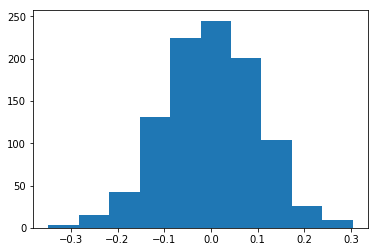

In [105]:
# Grafico 1000 muestras de una distribución normal con un valor medio de 0 y una desviación estándar de 0.1
sample_data = np.random.normal(0, 0.1, 1000)
plt.hist(sample_data)

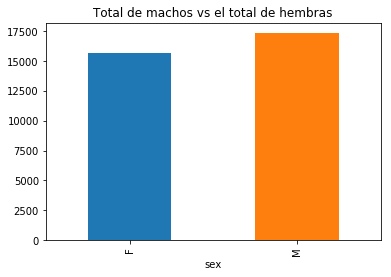

In [99]:
# Gráfica del total de machos contra el total de hembras para todo el dataset.
surveys_df.groupby('sex').count()["record_id"].plot(kind='bar',stacked=True,title="Total de machos vs el total de hembras")

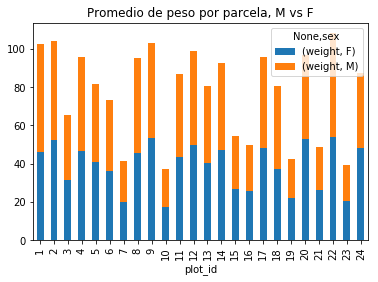

In [100]:
# selecciona los datos con isin:
stack_selection = surveys_df[(surveys_df['sex'].isin(['M', 'F'])) &
							surveys_df["weight"] > 0.][["sex", "weight", "plot_id"]]
# calcula el promedio de weight para cada combinación de plot_id y sex:
stack_selection = stack_selection.groupby(["plot_id", "sex"]).mean().unstack()
# podemos representarlo como un gráfico de barras apiladas:
stack_selection.plot(kind='bar', stacked=True, title="Promedio de peso por parcela, M vs F")

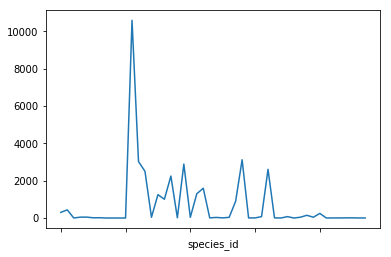

In [101]:
# Grafica de numero de muestras por especie 
conteo_especies = surveys_df.groupby('species_id')['record_id'].count()
conteo_especies.plot(kind='line')

Text(0.5, 0, 'id_sitio')

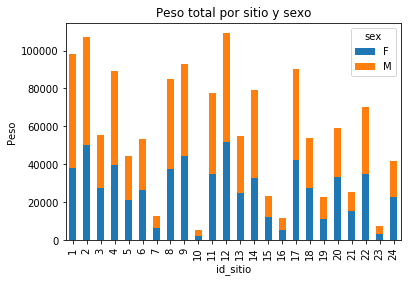

In [102]:
# Agrupamos por sitio y sexo, y se calcula el total
sitio_y_sexo = surveys_df.groupby(['plot_id','sex'])
total = sitio_y_sexo['weight'].sum()

# .unstack() en los datos agrupados para entender como el peso total de cada sexo contribuye a cada sitio.
sitio_y_sexo = surveys_df.groupby(['plot_id','sex'])
total = sitio_y_sexo['weight'].sum()
total.unstack()

# Grafico donde el peso para cada sexo es apilado por sitio.
sitio_y_sexo = surveys_df.groupby(['plot_id','sex'])
total = sitio_y_sexo['weight'].sum()
peso_por_sexo = total.unstack()
s_plot = peso_por_sexo.plot(kind='bar',stacked=True,title="Peso total por sitio y sexo")
s_plot.set_ylabel("Peso")
s_plot.set_xlabel("id_sitio")

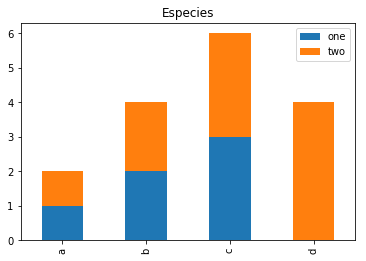

In [103]:
d = {'one' : pd.Series([1., 2., 3.], index=['a', 'b', 'c']),'two' : pd.Series([1., 2., 3., 4.], index=['a', 'b', 'c', 'd'])}
pd.DataFrame(d)

# Graficar datos apilados de modo que las columnas 'one' y 'two' estén apiladas
my_df = pd.DataFrame(d)
my_df.plot(kind='bar',stacked=True,title="Especies")


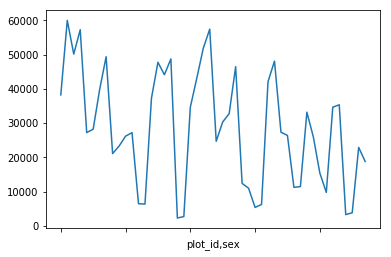

In [111]:
sitio_y_sexo = surveys_df.groupby(['plot_id','sex'])
total = sitio_y_sexo['weight'].sum()
total.plot(kind='line',title="Total")

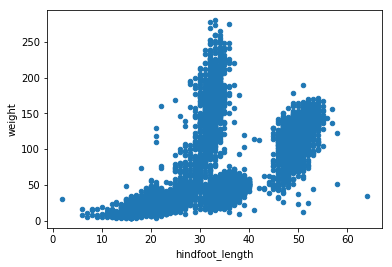

In [104]:
# Grafico de tamaño de pata en mm y peso del animal en gramos
surveys = pd.read_csv("surveys.csv")
my_plot = surveys.plot("hindfoot_length", "weight", kind="scatter")
plt.show()

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.16801463, -0.06801463,  0.03198537,  0.13198537,  0.23198537,
         0.33198537,  0.43198537,  0.53198537,  0.63198537,  0.73198537,
         0.83198537]),
 <a list of 10 Patch objects>)

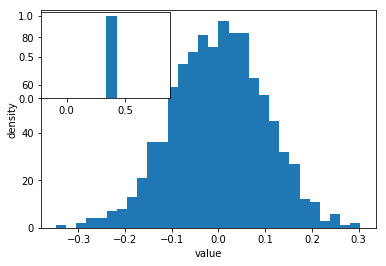

In [106]:
fig, ax1 = plt.subplots() # preparar un gráfico con matplotlib
ax1.hist(sample_data, 30)

# Crear el gráfico de una distribución Beta
a = 5
b = 10
beta_draws = np.random.beta(a, b)
# editar las etiquetas
ax1.set_ylabel('density')
ax1.set_xlabel('value')

# añadir ejes adicionales a la figura
ax2 = fig.add_axes([0.125, 0.575, 0.3, 0.3])
#ax2 = fig.add_axes([left, bottom, right, top])
ax2.hist(beta_draws)


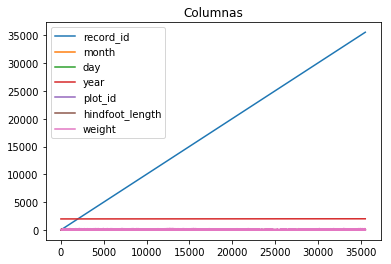

In [108]:
datos = surveys_df
datos.plot(kind="line",title="Columnas")

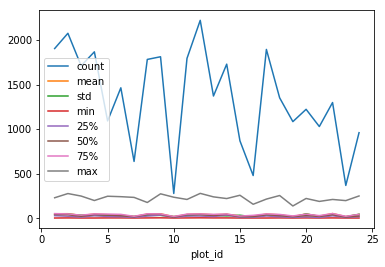

In [113]:
estats_peso = surveys_df.groupby(['plot_id'])['weight'].describe()
estats_peso.plot(kind='line')

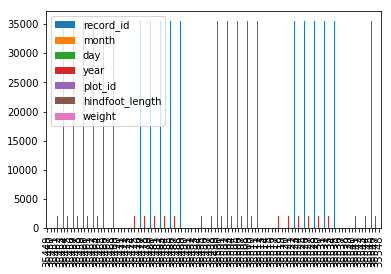

In [5]:
primeros_Datos = surveys_df.tail(100)
primeros_Datos.plot(kind="bar")